In [99]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.onetricks.gg/champions/ranking/Evelynn' 
response = requests.get(url)                               
soup = BeautifulSoup(response.content, 'html.parser')      
table = soup.find('table')                                 
rows = table.find_all('tr')                                

Here I import, store and request. Then parse the HTML content of the response using BeautifulSoup. Followed by finding the table element that contains the data and extract the data from the table rows.

In [100]:
with open('TopPlayers.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    writer.writerow(['Character','Role','Tier','Player', 'LP','Play Rate','Games','Win Rate','KDA', 'Region'])

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 12: 
            tier = cells[2].text.strip()
            player = cells[4].text.strip()
            lp = cells[7].text.strip()
            playRate = cells[8].text.strip()
            games = cells[9].text.strip()
            winRate = cells[10].text.strip()
            kda = cells[11].text.strip()
            
            if player.endswith('NA1:'):
                region = 'NA1'
            elif player.endswith('EUW1:'):
                region = 'EUW1'
            elif player.endswith('KR:'):
                region = 'KR'
            else:
                region = ''
            
            writer.writerow(["Evelynn","Assassin", tier, player, lp, playRate, games, winRate, kda, region])

In [101]:
url = 'https://www.onetricks.gg/champions/ranking/Nocturne' 
response = requests.get(url)                               
soup = BeautifulSoup(response.content, 'html.parser')      
table = soup.find('table')                                 
rows = table.find_all('tr') 

with open('TopPlayers.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 12: 
            tier = cells[2].text.strip()
            player = cells[4].text.strip()
            lp = cells[7].text.strip()
            playRate = cells[8].text.strip()
            games = cells[9].text.strip()
            winRate = cells[10].text.strip()
            kda = cells[11].text.strip()
            
            if player.endswith('NA1:'):
                region = 'NA1'
            elif player.endswith('EUW1:'):
                region = 'EUW1'
            elif player.endswith('KR:'):
                region = 'KR'
            else:
                region = ''
            
            writer.writerow(["Nocturne", "Assassin", tier, player, lp, playRate, games, winRate, kda, region])

In [102]:
url = 'https://www.onetricks.gg/champions/ranking/Rammus' 
response = requests.get(url)                               
soup = BeautifulSoup(response.content, 'html.parser')      
table = soup.find('table')                                 
rows = table.find_all('tr') 

with open('TopPlayers.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 12: 
            tier = cells[2].text.strip()
            player = cells[4].text.strip()
            lp = cells[7].text.strip()
            playRate = cells[8].text.strip()
            games = cells[9].text.strip()
            winRate = cells[10].text.strip()
            kda = cells[11].text.strip()
            
            if player.endswith('NA1:'):
                region = 'NA1'
            elif player.endswith('EUW1:'):
                region = 'EUW1'
            elif player.endswith('KR:'):
                region = 'KR'
            else:
                region = ''
            
            writer.writerow(["Rammus", "Tank", tier, player, lp, playRate, games, winRate, kda, region])

In [103]:
url = 'https://www.onetricks.gg/champions/ranking/Zac' 
response = requests.get(url)                               
soup = BeautifulSoup(response.content, 'html.parser')      
table = soup.find('table')                                 
rows = table.find_all('tr') 

with open('TopPlayers.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 12: 
            tier = cells[2].text.strip()
            player = cells[4].text.strip()
            lp = cells[7].text.strip()
            playRate = cells[8].text.strip()
            games = cells[9].text.strip()
            winRate = cells[10].text.strip()
            kda = cells[11].text.strip()
            
            if player.endswith('NA1:'):
                region = 'NA1'
            elif player.endswith('EUW1:'):
                region = 'EUW1'
            elif player.endswith('KR:'):
                region = 'KR'
            else:
                region = ''
            
            writer.writerow(["Zac", "Tank", tier, player, lp, playRate, games, winRate, kda, region])

In [104]:
with open('TopPlayers.csv', 'r') as f:
    reader = csv.reader(f)
    rows = [row for i, row in enumerate(reader) if i not in (1, 31, 50, 80)]

with open('TopPlayers.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(rows)


Here I create a CSV file called "TopPlayers.csv". Then I create the header used in the file along with extracting the data from the table cells. A column is also created containing the region of each player, which was extracted from the players name. (In League of Legends the players name and region are generally togethar). Here the second row of the CSV file is deleted.

In [105]:
df = pd.read_csv('TopPlayers.csv')
df['Win Rate'] = df['Win Rate'].str.replace('%', '').astype(float)
df['Play Rate'] = df['Play Rate'].str.replace('%', '').astype(float)
df['KDA'] = df['KDA'].str.replace(':1', '').astype(float)
df['LP'] = df['LP'].str.replace('LP', '').astype(int)
df['Games'] = df['Games'].astype(int)

Certain columns "Win Rate", "Play Rate", "KDA", "LP", "Games" are cleaned by getting rid of '%', ':1' or 'LP' to help run code further bellow.

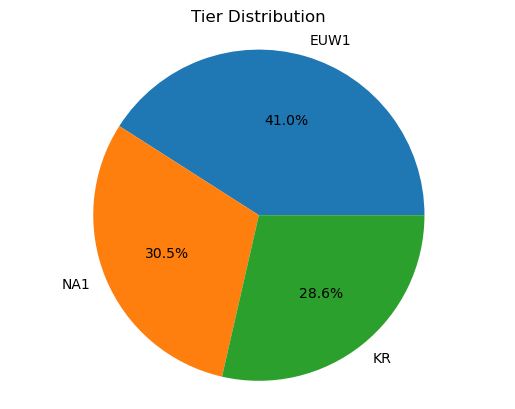

In [111]:
tier_counts = df['Region'].value_counts()
labels = tier_counts.index.tolist()
sizes = tier_counts.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Region Distribution')
plt.axis('equal')
plt.show()

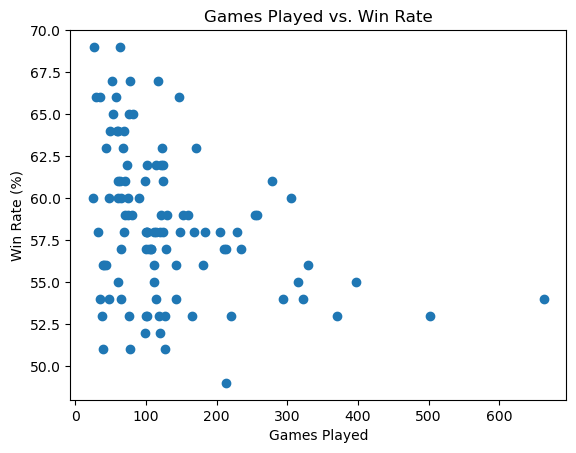

In [108]:
df_sorted = df.sort_values(by=['KDA', 'Win Rate'], ascending=True)

plt.scatter(df_sorted['Games'], df_sorted['Win Rate'])

plt.title('Games Played vs. Win Rate')
plt.xlabel('Games Played')
plt.ylabel('Win Rate (%)')

plt.show()

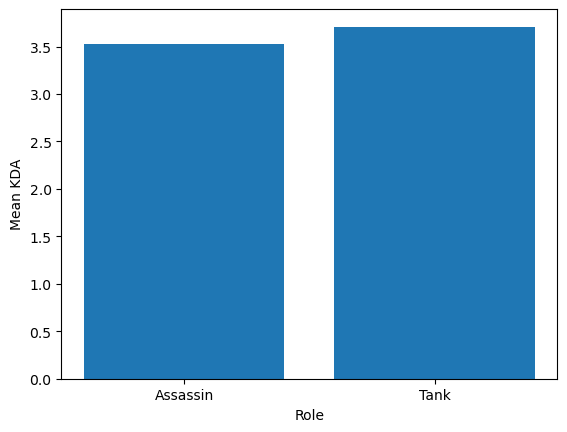

In [94]:
df_filtered = df[df['Role'].isin(['Assassin', 'Tank'])]
df_grouped = df_filtered.groupby('Role').agg({'KDA': 'mean'}).reset_index()

plt.bar(df_grouped['Role'], df_grouped['KDA'])
plt.title('Assassin KDA vs. Tank KDA')
plt.xlabel('Role')
plt.ylabel('Mean KDA')
plt.show()


A pie chart is created based off of region. I can notice that EUW1(Europe) has a majority of the best Evelynn players followed by NA1(North America) and KR(Korea).

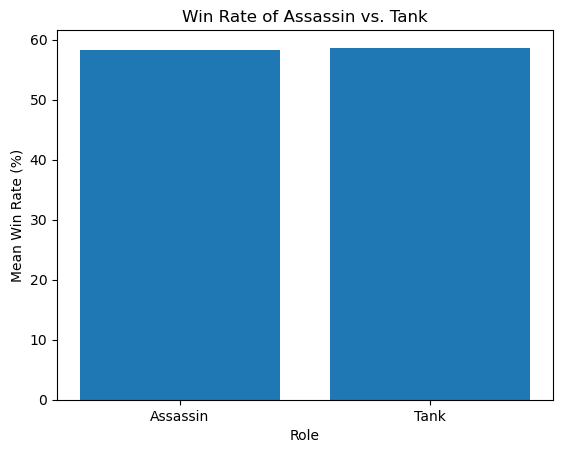

In [114]:
df_filtered = df[df['Role'].isin(['Assassin', 'Tank'])]
df_grouped = df_filtered.groupby('Role').agg({'Win Rate': 'mean'}).reset_index()

plt.bar(df_grouped['Role'], df_grouped['Win Rate'])
plt.title('Win Rate of Assassin vs. Tank')
plt.xlabel('Role')
plt.ylabel('Mean Win Rate (%)')
plt.show()

In [115]:
df.to_csv("Top_Players.csv")

Now I save a copie of the non-raw Data as a CSV.